In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import os
from src.progress_bar import printProgressBar

for dirname, _, filenames in os.walk('../../data/lyrics'):
    for filename in filenames:
        print(os.path.join(dirname, filename).replace("\\","/"))

print(50*'-')

for dirname, _, filenames in os.walk('../../data/billboard'):
    for filename in filenames:
        print(os.path.join(dirname, filename).replace("\\","/"))


../../data/lyrics/artist_song_lyrics.csv
../../data/lyrics/bb-t100-lyrics.csv
../../data/lyrics/corona-lyrics.csv
../../data/lyrics/lyrics_invalid.json
../../data/lyrics/lyrics_invalid_updated.csv
../../data/lyrics/backups/artist_song_lyrics_bak.csv
--------------------------------------------------
../../data/billboard/bb-t100.csv
../../data/billboard/billboard_top_100_2020.csv
../../data/billboard/backups/bb-t100_backup.csv


In [10]:
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_colwidth', 30)
lyrics = pd.read_csv('../../data/lyrics/bb-t100-lyrics.csv', index_col=0)
lyrics.head()


,billboard_id,lyrics_id,artist,first_artist,song,weeks_on_chart,peak_rank,lyrics,url,length,word_count,language,language_score,languages_sent,language_sent,language_sent_weight
0,0,0,Ariana Grande,Ariana Grande,"Thank U, Next",28.0,1.0,Thought I'd end up with Se...,https://genius.com/Ariana-...,2409,460,en,0.999997,{'en': 8},en,1.000000
1,1,1,Halsey,Halsey,Without Me,52.0,1.0,Found you when your heart ...,https://genius.com/Halsey-...,2095,435,en,0.999995,"{'en': 10, 'cy': 1, 'fi': 1}",en,0.833333
2,2,2,Mariah Carey,Mariah Carey,All I Want For Christmas I...,43.0,1.0,I don't want a lot for Chr...,https://genius.com/Mariah-...,1918,388,en,0.999996,"{'en': 16, 'et': 1}",en,0.941176
3,3,3,Travis Scott,Travis Scott,Sicko Mode,52.0,1.0,"Astro, yeah\nSun is down, ...",https://genius.com/Travis-...,3943,771,en,0.999998,{},NaN,0.000000
4,4,4,Post Malone & Swae Lee,Post Malone,Sunflower (Spider-Man: Int...,53.0,1.0,"Ayy, ayy, ayy, ayy (Ooh)\n...",https://genius.com/Post-ma...,1534,305,en,0.999997,"{'en': 3, 'tl': 1, 'so': 1}",en,0.600000


In [11]:
lyrics_lat = lyrics[['billboard_id','lyrics_id', 'artist', 'first_artist', 'song', 'weeks_on_chart', 'peak_rank',
       'lyrics']].head()

print(lyrics_lat.to_latex(index=False))


\begin{tabular}{rrlllrrl}
\toprule
 billboard\_id &  lyrics\_id &                 artist &  first\_artist &                           song &  weeks\_on\_chart &  peak\_rank &                         lyrics \\
\midrule
            0 &          0 &          Ariana Grande & Ariana Grande &                  Thank U, Next &            28.0 &        1.0 & Thought I'd end up with Sea... \\
            1 &          1 &                 Halsey &        Halsey &                     Without Me &            52.0 &        1.0 & Found you when your heart w... \\
            2 &          2 &           Mariah Carey &  Mariah Carey & All I Want For Christmas Is... &            43.0 &        1.0 & I don't want a lot for Chri... \\
            3 &          3 &           Travis Scott &  Travis Scott &                     Sicko Mode &            52.0 &        1.0 & Astro, yeah\textbackslash nSun is down, f... \\
            4 &          4 & Post Malone \& Swae Lee &   Post Malone & Sunflower (Spider-Man: In

In [49]:
bb_t100 = pd.read_csv('../../data/billboard/bb-t100.csv', index_col=0)
bb_t100.rename(columns={'id' : 'billboard_id'}, inplace=True)
bb_t100 = bb_t100.merge(lyrics[['lyrics_id', 'billboard_id']],how='left', left_on='billboard_id', right_on='billboard_id', copy=False)
bb_t100 = bb_t100.sort_values(by=['artist', 'song', 'lyrics_id']).interpolate(method='pad')
bb_t100['lyrics_id'] = pd.to_numeric(bb_t100['lyrics_id'], downcast='integer')
bb_t100['date'] = pd.to_datetime(bb_t100['date'], format='%Y-%m-%d')
bb_t100.sort_values(by='billboard_id', inplace=True)
bb_t100.head()

,billboard_id,song,artist,peak_rank,rank_last_week,weeks_on_chart,rank,date,lyrics_id
0,0,"Thank U, Next",Ariana Grande,1,1,8,1,2019-01-05,0
1,1,Without Me,Halsey,2,2,12,2,2019-01-05,1
2,2,All I Want For Christmas Is You,Mariah Carey,3,7,30,3,2019-01-05,2
3,3,Sicko Mode,Travis Scott,1,3,21,4,2019-01-05,3
4,4,Sunflower (Spider-Man: Into The Spider-Verse),Post Malone & Swae Lee,4,4,10,5,2019-01-05,4


In [13]:
missing_lyrics = pd.read_excel('data\output\missing_lyrics.xlsx', index_col=0)
missing_lyrics['lyrics_id'] = missing_lyrics.index
missing_lyrics.rename(columns={'id' : 'billboard_id'}, inplace=True)
missing_lyrics.columns

Index(['billboard_id', 'artist', 'first_artist', 'song', 'weeks_on_chart',
       'peak_rank', 'lyrics', 'length', 'word_count', 'language',
       'language_score', 'link', 'lyrics_id'],
      dtype='object')

In [14]:
pd.set_option('display.max_colwidth', 150)
missing_lyrics_example = missing_lyrics[['billboard_id', 'lyrics_id', 'artist', 'song', 'lyrics']].loc[[353, 506, 97]]
missing_lyrics_example.reset_index(drop=True, inplace=True)
missing_lyrics_example

,billboard_id,lyrics_id,artist,song,lyrics
0,8601,353,Drake Featuring Lil Durk,Laugh Now Cry Later,!Error!
1,8299,506,J. Cole,the.climb.back,!NoSong!
2,9707,97,Ariana Grande Feat. Doja Cat & Megan Thee Stallion,34+35,34+35 - Ariana Grande Never Change (feat. Future) - Trippie Redd Kids Again - Sam Smith Fever - Dua Lipa off the table (with The Weeknd) - Ariana ...


In [15]:
import spacy
nlp = spacy.load("en_core_web_lg")
nlp.Defaults.stop_words |= {'ai','gon'}

In [16]:
import re
#inspired by: https://betterprogramming.pub/extract-keywords-using-spacy-in-python-4a8415478fbf
def get_keywords(text, nlp):
    text = re.sub(u'[^\\x00-\\x7F\\x80-\\xFF\\u0100-\\u017F\\u0180-\\u024F\\u1E00-\\u1EFF]', u'', text)
    doc = nlp(text.lower())
    keywords = {}
    pos_tag = ['NOUN', 'ADJ', 'PROPN', 'VERB']
    for token in doc:
        if token.text in nlp.Defaults.stop_words or token.is_oov:
            continue

        if token.pos_ in pos_tag:
            keyword = token.lemma_
            if keyword in keywords.keys():
                keywords[keyword]+=1
            else:
                keywords[keyword] = 1

    return dict(sorted(keywords.items(), key=lambda item: item[1], reverse=True))


In [17]:
import ast
try:
    keywords = pd.read_csv('../../data/cache/data_preparation_keywords.csv', index_col=0)
    keywords['keywords'] = keywords['keywords'].apply(lambda dict: ast.literal_eval(dict))
except:
    lyrics_series = lyrics['lyrics']
    i = 0
    l = len(lyrics_series)
    keywords = []
    printProgressBar(0, l, prefix = 'Progress:', suffix = 'Complete', length = 50)
    for text in lyrics_series:
        keywords.append(get_keywords(text, nlp))
        i+=1
        printProgressBar(i, l, prefix = 'Progress:', suffix = 'Complete', length = 50)

lyrics['keywords'] = keywords
lyrics['keywords'].to_csv('../../data/cache/data_preparation_keywords.csv')

Progress: |██████████████████████████████████████████████████| 100.0% Complete


In [18]:
def get_top_keyword(keywords, pos):
    if len(keywords) > 0 and pos < len(keywords):
        return list(keywords)[pos]
    else:
        return ''
lyrics['keyword_1'] = lyrics['keywords'].apply(lambda keywords: get_top_keyword(keywords,0))
lyrics['keyword_2'] = lyrics['keywords'].apply(lambda keywords: get_top_keyword(keywords,1))
lyrics['keyword_3'] = lyrics['keywords'].apply(lambda keywords: get_top_keyword(keywords,2))
lyrics['keyword_4'] = lyrics['keywords'].apply(lambda keywords: get_top_keyword(keywords,3))
lyrics['keyword_5'] = lyrics['keywords'].apply(lambda keywords: get_top_keyword(keywords,4))

lyrics.sort_values(by='keyword_1').head()

,billboard_id,lyrics_id,artist,first_artist,song,weeks_on_chart,peak_rank,lyrics,url,length,...,language_score,languages_sent,language_sent,language_sent_weight,keywords,keyword_1,keyword_2,keyword_3,keyword_4,keyword_5
1241,10399,1241,Kid Cudi,Kid Cudi,Beautiful Trip,1.0,100.0,"Oh, oh\nOh\nThree (Three, two, one)",https://genius.com/Kid-cudi-beautiful-trip-lyrics,33,...,0.999997,{'en': 1},en,1.0,{},,,,,
191,973,191,Gunna Featuring Young Thug,Gunna,3 Headed Snake,1.0,74.0,"Aimin' at a date, aimin' at a Wraith, aimin' at a gate, mmh\nAimin' at a date, aimin' at a Wraith, aimin' at a gate, mmh\nAimin' at a date, aimin'...",https://genius.com/Gunna-3-headed-snake-lyrics,4788,...,0.999997,{'en': 4},en,1.0,"{'aimin': 24, 'get': 19, 'wraith': 10, 'gate': 10, 'shit': 9, 'fuck': 8, 'snake': 7, 'date': 6, 'run': 6, 'mil': 6, 'mmh': 5, 'gunna': 5, 'wheezy'...",aimin,get,wraith,gate,shit
990,8113,990,Juice WRLD,Juice WRLD,Titanic,2.0,14.0,"DY definitely Krazy\n\nAbandon all ships, it's about to go down\nNo Titanic (Titanic)\nThere's a lot going on in my head right now\nBut I manage (...",https://genius.com/Juice-wrld-titanic-lyrics,2079,...,0.999995,{},NaN,0.0,"{'air': 13, 'midnight': 10, 'titanic': 8, 'fuck': 7, 'good': 6, 'hand': 6, 'damage': 6, 'manage': 5, 'go': 5, 'drown': 4, 'abandon': 3, 'ship': 3,...",air,midnight,titanic,fuck,good
464,3736,464,Post Malone,Post Malone,Allergic,2.0,37.0,"Wasted on Sunday\nErase you on Monday\nAllergic, allergic\nGave in by Friday\nWent straight back to sideways\nAllergic, allergic\n\nI took your pi...",https://genius.com/Post-malone-allergic-lyrics,1032,...,0.999997,{'en': 2},en,1.0,"{'allergic': 8, 'sad': 5, 'true': 5, 'bad': 5, 'give': 4, 'feel': 4, 'reason': 3, 'believe': 3, 'pill': 2, 'drug': 2, 'friend': 2, 'demon': 2, 'se...",allergic,sad,true,bad,give
473,3812,473,"Ariana Grande, Miley Cyrus & Lana Del Rey","Ariana Grande, Miley Cyrus",Don't Call Me Angel (Charlie's Angels),7.0,13.0,"Boy, don't call me angel\nYou ain’t got me right\nDon't call me angel\nYou can't pay my price\nAin’t from no Heaven\nYeah, you heard me right (Yea...",https://genius.com/Ariana-grande-miley-cyrus-and-lana-del-rey-dont-call-me-angel-charlies-angels-lyrics,2116,...,0.999997,{'en': 4},en,1.0,"{'angel': 18, 'know': 13, 'hear': 10, 'right': 8, 'heaven': 5, 'get': 4, 'pay': 4, 'price': 4, 'fly': 4, 'boy': 4, 'mouth': 3, 'lie': 3, 'need': 2...",angel,know,hear,right,heaven


In [19]:
print(lyrics['keyword_1'].unique())


['thank' 'know' 'want' 'light' 'ayy' 'high' 'jingle' 'christmas' 'ding'
 'gettin' 'wonderful' 'girl' 'z' 'reindeer' 'nigga' 'fly' 'money' 'snow'
 'run' 'breathin' 'let' 'give' 'heart' 'santa' 'feliz' 'taki' 'home'
 'fuck' 'look' 'dawg' 'lot' 'bad' 'like' 'blue' 'speechless' 'tree'
 'natural' 'get' 'tell' 'beautiful' 'feel' 'sha' 'la' 'merry' 'stick'
 'believe' 'close' 'hangover' 'bitch' 'da' 'friend' 'imagine' 'baby'
 'monster' 'love' 'dig' 'arm' 'break' 'old' 'little' 'crazy' 'lie' 'ma'
 'bullshit' 'meet' 'night' 'good' 'stylist' 'find' 'smoke' 'shot' 'dollar'
 'mind' 'talk' 'smile' 'brick' 'country' 'hmm' 'heaven' 'honky' 'shit'
 'ruin' 'body' 'dip' 'tonight' 'cigarette' 'check' 'undecided' 'diamond'
 'door' 'lose' 'dance' 'twerk' 'care' 'bust' 'jumpin' 'real' 'leave'
 'rich' 'way' 'drug' 'taste' 'wanna' 'tired' 'sleep' 'sauce' 'work' 'try'
 'bag' 'miss' 'girlfriend' 'needy' 'need' 'fake' 'forget' 'think' 'rain'
 'woo' 'eye' 'wrong' 'clout' 'park' 'aimin' 'time' 'hold' 'guess' 'ghett

In [20]:
weird_keywords = ['ayy', 'z' , 'taki', 'sha', 'la', 'ai', 'da', 'ma', 'hmm' , 'gon' , 'un', 'e', 'ta' , 's', 'cum' , 'mm' , 'na', 'ra', 'thi', 'u', 'marni', 'ody', 'wah']

In [26]:
lyrics.columns

Index(['billboard_id', 'lyrics_id', 'artist', 'first_artist', 'song',
       'weeks_on_chart', 'peak_rank', 'lyrics', 'url', 'length', 'word_count',
       'language', 'language_score', 'languages_sent', 'language_sent',
       'language_sent_weight', 'keywords', 'keyword_1', 'keyword_2',
       'keyword_3', 'keyword_4', 'keyword_5'],
      dtype='object')

In [50]:
bb_t100['year'] = bb_t100['date'].apply(lambda date: date.year)
ids2019 = bb_t100['lyrics_id'].loc[bb_t100['year'] == 2019].unique()
ids2020 = bb_t100['lyrics_id'].loc[bb_t100['year'] == 2020].unique()


In [51]:
keywords_2019_pt = pd.pivot_table(lyrics.loc[ids2019], index=['keyword_1'],
                                    values=['lyrics_id'],
                                    aggfunc={'lyrics_id' : 'count'})
keywords_2019_pt.sort_values(by='lyrics_id', inplace=True, ascending=False)
keywords_2019_pt

,lyrics_id
keyword_1,
get,46
nigga,32
love,26
want,20
know,20
...,...
honky,1
hoo,1
horse,1


In [53]:
keywords_2019_list = []

for row in keywords_2019_pt.itertuples():
    keywords_2019_list.append(row)

keywords_2019 = pd.DataFrame(keywords_2019_list)

keywords_2019['keyword_1'] = pd.DataFrame(keywords_2019['Index'].tolist())

keywords_2019 = keywords_2019[['keyword_1', 'lyrics_id']]
keywords_2019.rename(columns={'lyrics_id' : 'count'}, inplace=True)
keywords_2019.head()

top50_keywords_2019 = ', '.join(keywords_2019['keyword_1'].to_list()[:50])
top50_keywords_2019


'get, nigga, love, want, know, bitch, time, let, wanna, fuck, bad, baby, need, girl, ayy, god, come, shit, good, feel, la, tell, christmas, dance, mind, think, light, da, talk, run, man, find, heart, look, check, real, woo, summer, lie, head, high, like, heartless, hold, leave, hot, street, hate, raise, slide'

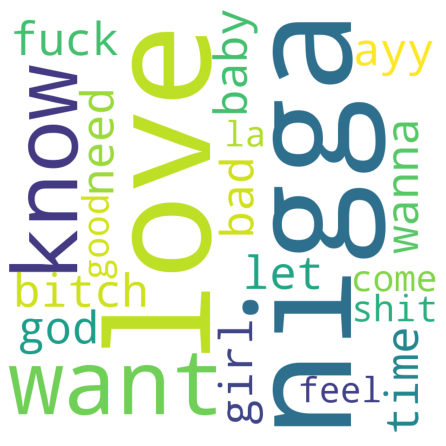

In [54]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 20,max_words=20).generate(top50_keywords_2019)
# plot the WordCloud image
plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
wordcloud.to_file('2019.jpg')
plt.show()

In [55]:
keywords_2020_pt = pd.pivot_table(lyrics.loc[ids2020], index=['keyword_1'],
                                    values=['lyrics_id'],
                                    aggfunc={'lyrics_id' : 'count'})
keywords_2020_pt.sort_values(by='lyrics_id', inplace=True, ascending=False)
keywords_2020_pt

,lyrics_id
keyword_1,
get,67
know,53
nigga,48
love,26
bitch,25
...,...
keep,1
killin,1
leavin,1


In [56]:
keywords_2020_list = []

for row in keywords_2020_pt.itertuples():
    keywords_2020_list.append(row)

keywords_2020 = pd.DataFrame(keywords_2020_list)

keywords_2020['keyword_1'] = pd.DataFrame(keywords_2020['Index'].tolist())

keywords_2020 = keywords_2020[['keyword_1', 'lyrics_id']]
keywords_2020.rename(columns={'lyrics_id' : 'count'}, inplace=True)
keywords_2020.head()

top50_keywords_2020 = ', '.join(keywords_2020['keyword_1'].to_list()[:50])
top50_keywords_2020


'get, know, nigga, love, bitch, want, ayy, time, come, baby, let, la, woo, wanna, need, fuck, run, tell, pussy, christmas, good, shit, way, girl, night, look, feel, go, da, bad, big, hope, na, say, gang, money, mm, thing, think, talk, leave, mad, stay, happy, like, hold, shoot, life, god, man'

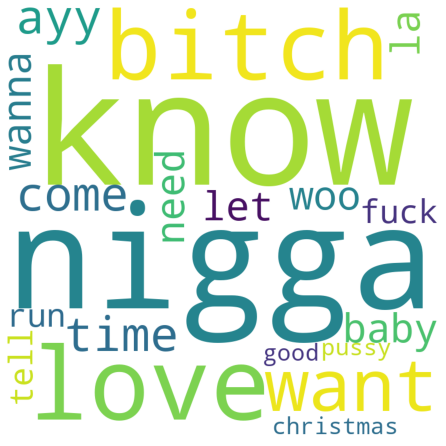

In [57]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 20,max_words=20).generate(top50_keywords_2020)
# plot the WordCloud image
plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
wordcloud.to_file('2020.jpg')
plt.show()

In [58]:
print(keywords_2019['keyword_1'].to_list()[:50])
print(keywords_2020['keyword_1'].to_list()[:50])

['get', 'nigga', 'love', 'want', 'know', 'bitch', 'time', 'let', 'wanna', 'fuck', 'bad', 'baby', 'need', 'girl', 'ayy', 'god', 'come', 'shit', 'good', 'feel', 'la', 'tell', 'christmas', 'dance', 'mind', 'think', 'light', 'da', 'talk', 'run', 'man', 'find', 'heart', 'look', 'check', 'real', 'woo', 'summer', 'lie', 'head', 'high', 'like', 'heartless', 'hold', 'leave', 'hot', 'street', 'hate', 'raise', 'slide']
['get', 'know', 'nigga', 'love', 'bitch', 'want', 'ayy', 'time', 'come', 'baby', 'let', 'la', 'woo', 'wanna', 'need', 'fuck', 'run', 'tell', 'pussy', 'christmas', 'good', 'shit', 'way', 'girl', 'night', 'look', 'feel', 'go', 'da', 'bad', 'big', 'hope', 'na', 'say', 'gang', 'money', 'mm', 'thing', 'think', 'talk', 'leave', 'mad', 'stay', 'happy', 'like', 'hold', 'shoot', 'life', 'god', 'man']


In [78]:
# corona_keywords = ['antidote', 'contact', 'contracting', 'corona', 'coronavirus', 'cough', 'cure', 'distancing',
#                     'flu', 'hazmat', 'hospitable', 'ill', 'mask', 'pandemic', 'quarantine', 'sars', 'sick', 'solitary',
#                    'symptom', 'threat', 'virus', 'wave']
corona_keywords = ['corona', 'coronavirus', 'pandemic', 'quarantine', 'sars']
def is_corona_song(keywords):
    for word in corona_keywords:
        if word in keywords:
            return True
    return  False

In [79]:
lyrics['is_corona_song'] = lyrics['keywords'].apply(lambda keywords: is_corona_song(keywords))
corona_lyrics = lyrics.loc[lyrics['is_corona_song'] == True]
corona_lyrics.to_excel('../../data/output/corona_lyrics_bb.xlsx', encoding='utf-8')
corona_lyrics


,billboard_id,lyrics_id,artist,first_artist,song,weeks_on_chart,peak_rank,lyrics,url,length,...,languages_sent,language_sent,language_sent_weight,keywords,keyword_1,keyword_2,keyword_3,keyword_4,keyword_5,is_corona_song
202,1051,202,Thomas Rhett,Thomas Rhett,Look What God Gave Her,20.0,32.0,"Don't even want the attention\nBut yeah, that's all that she's getting\nHer song is on and she's spinning around, yeah\nShe got me drunk like Coro...",https://genius.com/Thomas-rhett-look-what-god-gave-her-lyrics,1555,...,"{'en': 10, 'id': 2}",en,0.833333,"{'look': 10, 'god': 9, 'give': 9, 'get': 8, 'walk': 4, 'know': 4, 'swear': 3, 'perfect': 3, 'room': 3, 'answer': 3, 'prayer': 3, 'way': 3, 'move':...",look,god,give,get,walk,True
815,6822,815,twenty one pilots,twenty one pilots,Level Of Concern,11.0,23.0,"Need you, tell me\nNeed you, tell me\n\nPanic on the brain, world has gone insane\nThings are starting to get heavy, mm\nI can't help but think I ...",https://genius.com/Twenty-one-pilots-level-of-concern-lyrics,2141,...,{'en': 6},en,1.000000,"{'tell': 38, 'need': 19, 'okay': 17, 'alright': 14, 'level': 11, 'concern': 11, 'bring': 6, 'walk': 4, 'hear': 4, 'way': 3, 'quarantine': 3, 'pani...",tell,need,okay,alright,level,True
877,7202,877,6ix9ine,6ix9ine,Gooba,10.0,3.0,"I tell a nigga don't dick ride, don't blick ride\nLeave it to the double thick thighs, twin sisters\nDrop it down and wobble, wobble up, mami boot...",https://genius.com/6ix9ine-gooba-lyrics,2093,...,{'en': 3},en,1.000000,"{'big': 10, 'nigga': 9, 'cha': 7, 'hater': 6, 'bitch': 6, 'mad': 6, 'slide': 5, 'dumb': 5, 'tell': 4, 'dick': 4, 'ride': 4, 'wobble': 4, 'gobble':...",big,nigga,cha,hater,bitch,True
887,7331,887,Future Featuring Travis Scott,Future,Solitaires,3.0,32.0,"(Wheezy outta here)\n\nSolitary diamonds, solitary jewels\nWith a bitch that's shinin', lookin' like the moon\nSaid she wanna party, wanna let it ...",https://genius.com/Future-solitaires-lyrics,2898,...,{'en': 8},en,1.000000,"{'solitary': 10, 'get': 10, 'diamond': 9, 'wanna': 5, 'loose': 5, 'jewel': 4, 'bitch': 4, 'let': 4, 'gettin': 4, 'money': 4, 'come': 3, 'woo': 3, ...",solitary,get,diamond,wanna,loose,True
939,7700,939,6ix9ine & Nicki Minaj,6ix9ine,Trollz,4.0,1.0,"(Sad Pony)\nWatch, mhm, Glock, mhm, cocked, mhm, got it, mhm\nYou need that? I got it, this cash, my pockets\nThe 'Cat one hundred, you need that?...",https://genius.com/6ix9ine-and-nicki-minaj-trollz-lyrics,3332,...,"{'en': 3, 'pl': 1, 'sq': 1}",en,0.600000,"{'get': 10, 'ass': 7, 'like': 6, 'throwin': 6, 'need': 5, 'cash': 5, 'vroom': 5, 'throw': 4, 'rack': 4, 'benz': 4, 'truck': 4, 'nigga': 4, 'bitch'...",get,ass,like,throwin,need,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1089,9194,1089,DaBaby Featuring Young Thug,DaBaby,Blind,9.0,74.0,"Yeah, yeah, yeah\nI've been blind for a while now\n\nI just got the key, they let me in, no ID\nDoors openin' up for me and now I see\nI've been b...",https://genius.com/Dababy-blind-lyrics,2385,...,"{'en': 14, 'id': 3, 'tr': 1}",en,0.777778,"{'blind': 14, 'get': 7, 'let': 7, 'key': 5, 'd': 5, 'nigga': 5, 'door': 5, 'catch': 4, 'fuck': 4, 'openin': 4, 'head': 3, 'know': 3, 'goddamn': 2,...",blind,get,let,key,d,True
1102,9309,1102,21 Savage & Metro Boomin Featuring Drake,21 Savage & Metro Boomin,Mr. Right Now,12.0,10.0,"(Metro)\n\nI'ma slide anytime you want\nPut you in Chanel, I'ma teach you how to stunt (21)\nSlip and slide like a waterfall\nYou need some TLC, w...",https://genius.com/21-savage-and-metro-boomin-mr-right-now-lyrics,3263,...,"{'en': 10, 'pt': 1, 'id': 1}",en,0.833333,"{'want': 10, 'fuck': 10, 'god': 9, 'turn': 7, 'slide': 6, 'slow': 6, 'mr': 6, '.': 6, 'nigga': 5, 'anytime': 4, 'phone': 4, 'clothe': 4, 'song': 4...",want,fuck,god,turn,slide,True
1162,9834,1162,"Mike WiLL Made-It, Nicki Minaj & YoungBoy Never Broke Again","Mike WiLL Made-It, Nicki Minaj",What That Speed Bout!?,1.0,35.0,"(EarDrummers)\nIt's the motherfuckin' queen (30, you a

In [66]:
corona_keywords =[]
for keywords in corona_lyrics['keywords']:
    for key in keywords:
        if not key in corona_keywords:
            corona_keywords.append(key)

print(sorted(corona_keywords))


["'", '-', '.', '1', '270', '6ix', 'absent', 'ace', 'actin', 'adapt', 'air', 'ajax', 'alam', 'alaykum', 'alive', 'alright', 'ancestor', 'andré', 'angel', 'ankara', 'ankh', 'anni', 'answer', 'antidote', 'anytime', 'ap', 'apartment', 'ape', 'aquafina', 'argument', 'army', 'art', 'ask', 'ass', 'assault', 'attack', 'attention', 'attire', 'await', 'ayo', 'ayy', 'b.i.g', 'baby', 'bachata', 'bad', 'baddie', 'bag', 'baguette', 'ball', 'band', 'bandos', 'bar', 'barbecue', 'barbeque', 'bat', 'bathing', 'battle', 'bead', 'beat', 'bee', 'beef', 'begin', 'believe', 'bentley', 'benz', 'berry', 'bestie', 'beyoncé', 'big', 'bill', 'billi', 'birth', 'bit', 'bitch', 'bite', 'bitter', 'bitty', 'black', 'blame', 'bless', 'blick', 'blind', 'blingin', 'block', 'blood', 'blow', 'blue', 'blunt', 'board', 'body', 'boeing', 'boot', 'bop', 'bottle', 'bounce', 'bouncin', 'bout', 'box', 'boy', 'brain', 'brand', 'brawl', 'break', 'brick', 'bring', 'brother', 'brr', 'buck', 'bucket', 'buddy', 'build', 'buildin', 'bu

In [67]:
merge_cols = lyrics.columns.difference(bb_t100.columns)
merge_cols = merge_cols.tolist()
merge_cols.append('billboard_id')
merge_cols

['first_artist',
 'is_corona_song',
 'keyword_1',
 'keyword_2',
 'keyword_3',
 'keyword_4',
 'keyword_5',
 'keywords',
 'language',
 'language_score',
 'language_sent',
 'language_sent_weight',
 'languages_sent',
 'length',
 'lyrics',
 'url',
 'word_count',
 'billboard_id']

In [69]:
lyrics = lyrics.sort_values(by='billboard_id')
all = bb_t100.merge(lyrics[merge_cols],how='left', left_on='billboard_id', right_on='billboard_id', copy=False)
all = all[['billboard_id',
           'lyrics_id',
           'date',
           'song',
           'artist',
           'first_artist',
           'lyrics',
           'url',
           'language',
           'language_score',
           'languages_sent',
           'language_sent',
           'language_sent_weight',
            'keywords',
           'keyword_1',
             'keyword_2',
             'keyword_3',
             'keyword_4',
             'keyword_5',
           'length',
           'word_count',
           'is_corona_song',
           'rank',
           'peak_rank',
           'rank_last_week',
           'weeks_on_chart']]


In [73]:
all = all.sort_values(by=['artist', 'song', 'lyrics_id']).interpolate(method='pad')
all.sort_values(by='billboard_id', inplace=True)
all['lyrics_id'] = pd.to_numeric(all['lyrics_id'], downcast='integer')
all['length'] = pd.to_numeric(all['length'], downcast='integer')
all['word_count'] = pd.to_numeric(all['word_count'], downcast='integer')
all['date'] = pd.to_datetime(all['date'], format='%Y-%m-%d')
all['year'] = all['date'].apply(lambda date: date.year)
all.to_excel('../../data/output/all.xlsx', encoding='utf-8')

all.head()

,billboard_id,lyrics_id,date,song,artist,first_artist,lyrics,url,language,language_score,...,keyword_4,keyword_5,length,word_count,is_corona_song,rank,peak_rank,rank_last_week,weeks_on_chart,year
0,0,0,2019-01-05,"Thank U, Next",Ariana Grande,Ariana Grande,"Thought I'd end up with Sean\nBut he wasn't a match\nWrote some songs about Ricky\nNow I listen and laugh\nEven almost got married\nAnd for Pete, ...",https://genius.com/Ariana-grande-thank-u-next-lyrics,en,0.999997,...,teach,patience,2409,460,False,1,1,1,8,2019
1,1,1,2019-01-05,Without Me,Halsey,Halsey,Found you when your heart was broke\nI filled your cup until it overflowed\nTook it so far to keep you close (Keep you close)\nI was afraid to lea...,https://genius.com/Halsey-without-me-lyrics,en,0.999995,...,baby,fall,2095,435,False,2,2,2,12,2019
2,2,2,2019-01-05,All I Want For Christmas Is You,Mariah Carey,Mariah Carey,I don't want a lot for Christmas\nThere is just one thing I need\nI don't care about the presents\nUnderneath the Christmas tree\nI just want you ...,https://genius.com/Mariah-carey-all-i-want-for-christmas-is-you-lyrics,en,0.999996,...,need,wish,1918,388,False,3,3,7,30,2019
3,3,3,2019-01-05,Sicko Mode,Travis Scott,Travis Scott,"Astro, yeah\nSun is down, freezin' cold\nThat's how we already know, winter's here\nMy dawg would probably do it for a Louis belt\nThat's just all...",https://genius.com/Travis-scott-sicko-mode-lyrics,en,0.999998,...,play,know,3943,771,False,4,1,3,21,2019
4,4,4,2019-01-05,Sunflower (Spider-Man: Into The Spider-Verse),Post Malone & Swae Lee,Post Malone,"Ayy, ayy, ayy, ayy (Ooh)\nOoh, ooh, ooh, ooh (Ooh)\nAyy, ayy\nOoh, ooh, ooh, ooh\n\nNeedless to say, I keep in check\nShe was a bad-bad, neverthel...",https://genius.com/Post-malone-and-swae-lee-sunflower-lyrics,en,0.999997,...,bad,know,1534,305,False,5,4,4,10,2019


In [71]:
all.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10500 entries, 0 to 10499
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   billboard_id          10500 non-null  int64         
 1   lyrics_id             10500 non-null  int16         
 2   date                  10500 non-null  datetime64[ns]
 3   song                  10500 non-null  object        
 4   artist                10500 non-null  object        
 5   first_artist          10500 non-null  object        
 6   lyrics                10500 non-null  object        
 7   url                   10500 non-null  object        
 8   language              10500 non-null  object        
 9   language_score        10500 non-null  float64       
 10  languages_sent        10500 non-null  object        
 11  language_sent         10498 non-null  object        
 12  language_sent_weight  10500 non-null  float64       
 13  keywords        

In [72]:
all.dtypes

billboard_id               int64
lyrics_id                  int16
date              datetime64[ns]
song                      object
artist                    object
                       ...      
is_corona_song              bool
rank                       int64
peak_rank                  int64
rank_last_week             int64
weeks_on_chart             int64
Length: 26, dtype: object

In [ ]:
pd.set_option('display.max_seq_items', 100)
pd.set_option('display.max_colwidth', 334)
blind = all[['artist', 'song', 'lyrics']].loc[all['song'] == 'Blinding Lights'].head(1)

blind

In [ ]:
print(blind.to_latex(index=True))

In [ ]:
all.loc[all['date'] == '2020-07-25'].head(5)
pd.set_option('display.max_colwidth', 200)
all_trans = all.head().transpose()
all_trans

In [ ]:
print(all_trans.to_latex())

In [ ]:
billboard = all[['billboard_id',
           'date',
           'song',
           'artist',
           'rank',
           'peak_rank',
           'rank_last_week',
           'weeks_on_chart']]
bill_desc = billboard.describe()
bill_desc

In [ ]:
print(bill_desc.to_latex(float_format="%.2f", bold_rows=True, escape=True))

In [ ]:
circles = billboard.loc[(billboard['song'] == 'Circles') & (billboard['artist'] == 'Post Malone')]
circles

In [ ]:
average_rank = pd.pivot_table(billboard, index=['date'],
                                values=['rank'],
                                aggfunc={'rank' : 'mean'})
average_rank

In [ ]:
#sns.set(rc={'axes.facecolor':'cornflowerblue', 'figure.facecolor':'white'})
sns.set_style({'axes.facecolor': 'lightgrey',
 'axes.edgecolor': 'black',
 'axes.grid': True,
 'axes.axisbelow': 'line',
 'axes.labelcolor': 'black',
 'figure.facecolor': 'white',
 'grid.color': 'white',
 'grid.linestyle': '-',
 'text.color': 'black',
 'xtick.color': 'black',
 'ytick.color': 'black',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'patch.edgecolor': 'black',
 'patch.force_edgecolor': False,
 'image.cmap': 'viridis',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['DejaVu Sans',
  'Bitstream Vera Sans',
  'Computer Modern Sans Serif',
  'Lucida Grande',
  'Verdana',
  'Geneva',
  'Lucid',
  'Arial',
  'Helvetica',
  'Avant Garde',
  'sans-serif'],
 'xtick.bottom': True,
 'xtick.top': False,
 'ytick.left': True,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True})
fig,ax = plt.subplots(figsize=(12,10))
ax.set(ylim=(26, 0), yticks=np.arange(1,26,1))
sns.lineplot(data=circles, x='date', y='rank', ax=ax)
plt.show